In [1]:
# The dataset gives us Walmart’s weekly sales performance across stores.
# The dataset is available at https://www.kaggle.com/datasets/mikhail1681/walmart-sales

# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# Importing the Dataset
df = pd.read_csv('Walmart_Sales.csv')


In [2]:
#list of first five rows
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
#list of last five rows
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [4]:
#shape
df.shape

(6435, 8)

In [5]:
# Data Info
#Basic information about data types, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
#statistical summary of numerical columns
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
#checking for missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
#convert 'date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [9]:
#convert new columns for featuring engineering
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['week'] = df['Date'].dt.isocalendar().week

In [10]:
# Summary statistics
df.describe()

# Unique stores
print("Total Stores:", df['Store'].nunique())

# Weekly sales range
print("Min sales:", df['Weekly_Sales'].min())
print("Max sales:", df['Weekly_Sales'].max())

Total Stores: 45
Min sales: 209986.25
Max sales: 3818686.45


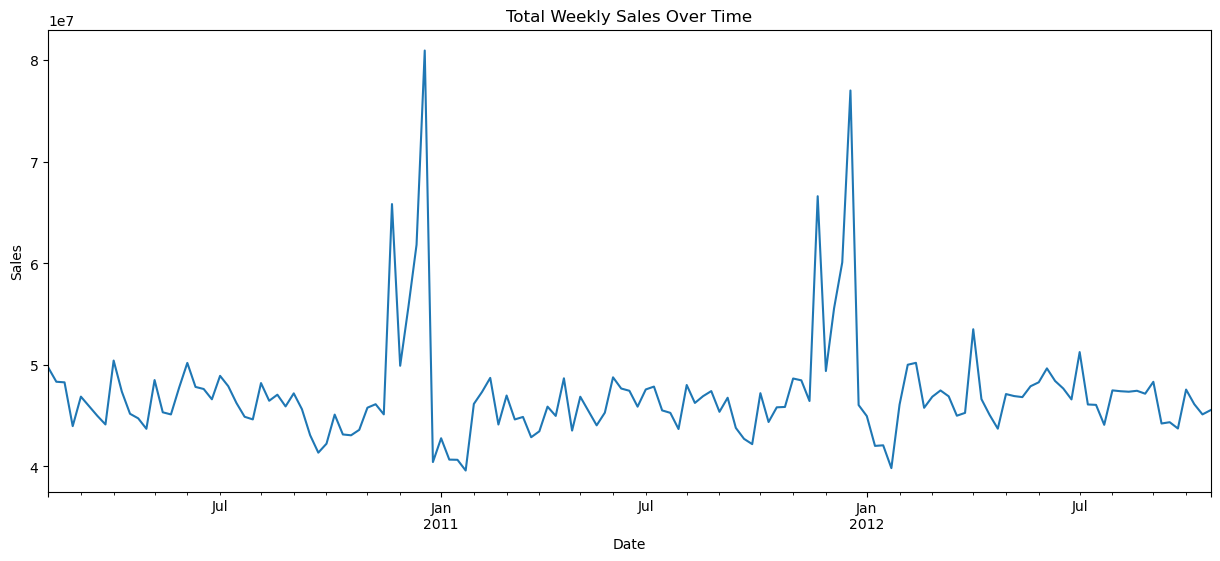

In [11]:
# Sales Trends Over Time

# Group by date and sum weekly sales
sales_over_time = df.groupby("Date")["Weekly_Sales"].sum()

plt.figure(figsize=(15,6))
sales_over_time.plot()
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


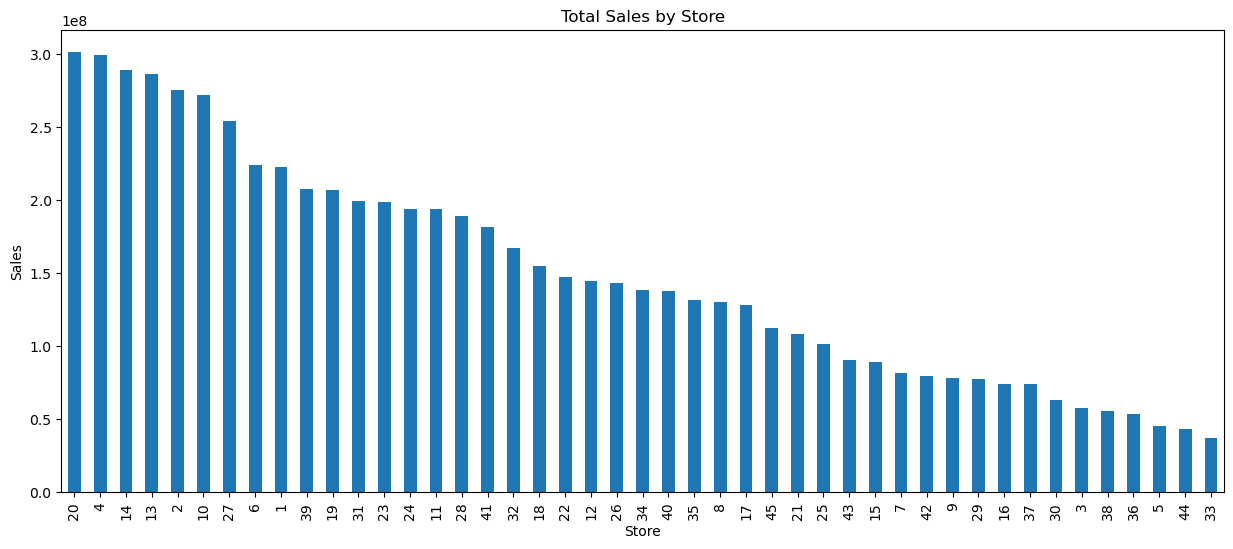

In [12]:
# Sales by Store

store_sales = df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(15,6))
store_sales.plot(kind='bar')
plt.title("Total Sales by Store")
plt.xlabel("Store")
plt.ylabel("Sales")
plt.show()

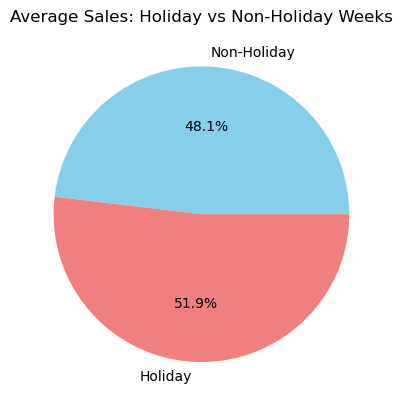

In [13]:
# Holiday vs Non-Holiday Sales

holiday_sales = df.groupby("Holiday_Flag")["Weekly_Sales"].mean()
labels = ["Non-Holiday", "Holiday"]

plt.pie(holiday_sales, labels=labels, autopct="%1.1f%%", colors=["skyblue", "lightcoral"])
plt.title("Average Sales: Holiday vs Non-Holiday Weeks")
plt.show()

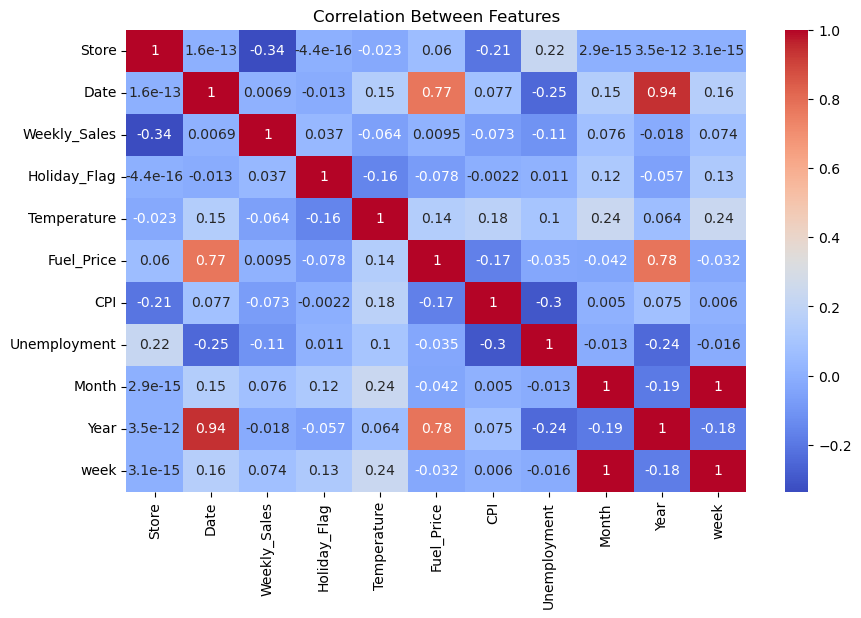

In [14]:
# 8. Correlation Heatmap

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

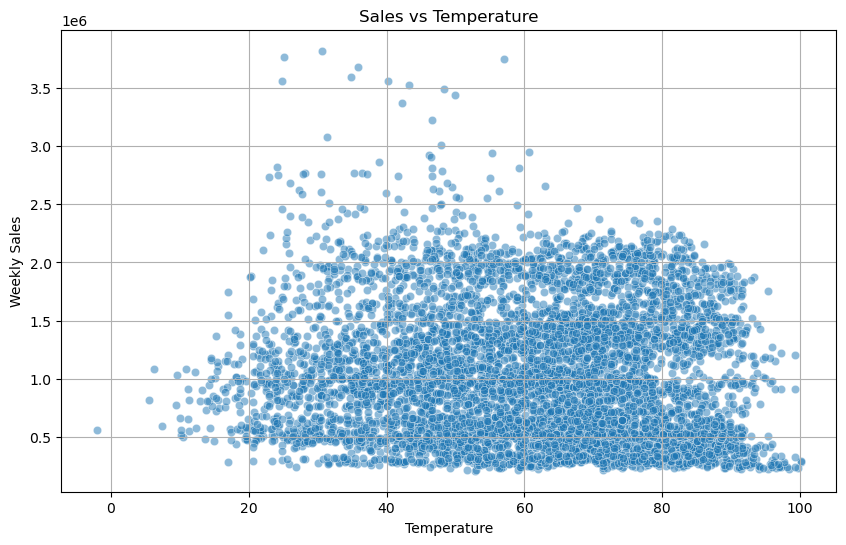

In [15]:
#effect of temparatures on sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df, alpha=0.5)
plt.title("Sales vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()

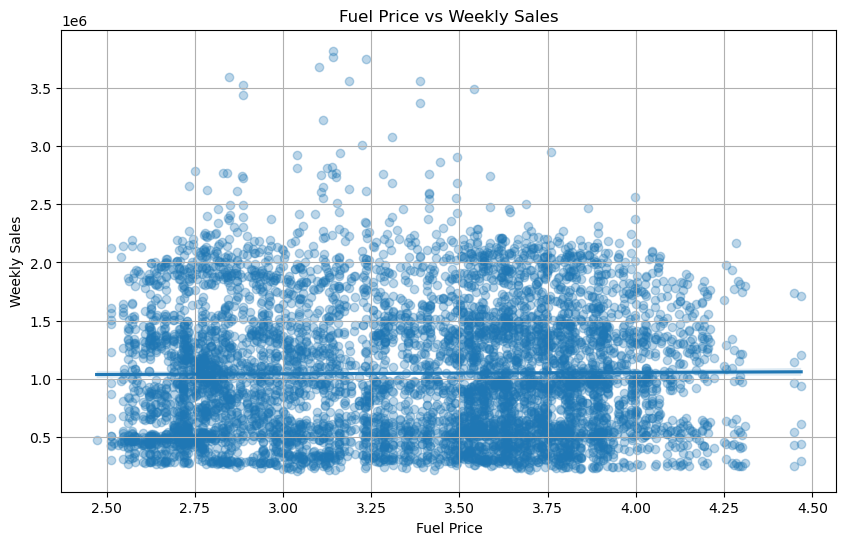

In [16]:
#Fuel prices vs Sales
plt.figure(figsize=(10, 6))
sns.regplot(x='Fuel_Price', y='Weekly_Sales', data=df, scatter_kws={'alpha':0.3})
plt.title("Fuel Price vs Weekly Sales")
plt.xlabel("Fuel Price")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()

In [17]:
# 9. Insights and Observations

# - Store 20 has the highest total sales.
# - Holiday weeks have 51.9% higher sales than non-holiday weeks.
# - There’s moderate negative correlation between unemployment and sales.
# - CPI and Fuel_Price have weak correlations with weekly sales.
# - Sales are relatively stable across temperatures, but some extreme cold/hot periods may cause dips.
# - Higher fuel prices might correlate with lower sales, possibly due to reduced consumer spending.